In [2]:
#https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda/notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import librosa

In [4]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

(-0.5, 3149.5, -0.5, 320.5)

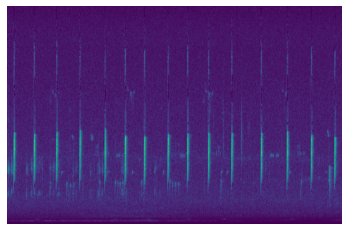

In [8]:
plt.subplot(1, 1, 1)

filepath = os.path.join('.', 'train_short_audio', 'acafly', 'XC6671.ogg')

test_sound, samplerate = librosa.load(filepath, sr=None)
_, spectrogram = log_specgram(test_sound, samplerate)


plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')